# K-means Clustering for Retail Purchase Analysis

# Data Preprocessing

# Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncode


# Load Dataset

In [55]:
df = pd.read_csv('Customerdata.csv')

# DISPLAY DATASET

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df.shape

(200, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Checking Missing Value

In [60]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory data analysis

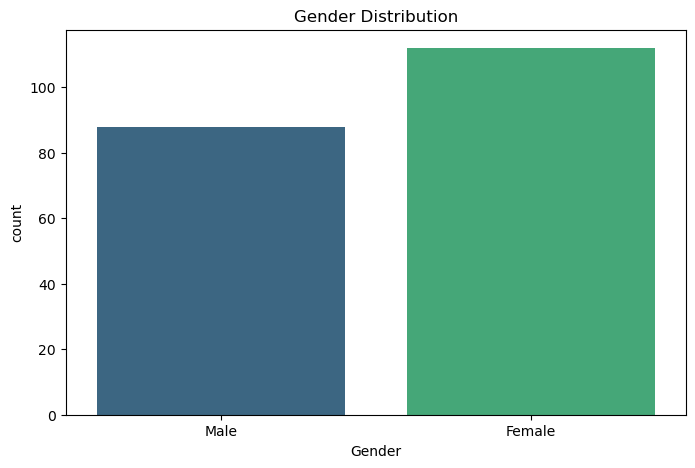

In [61]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')
plt.show()

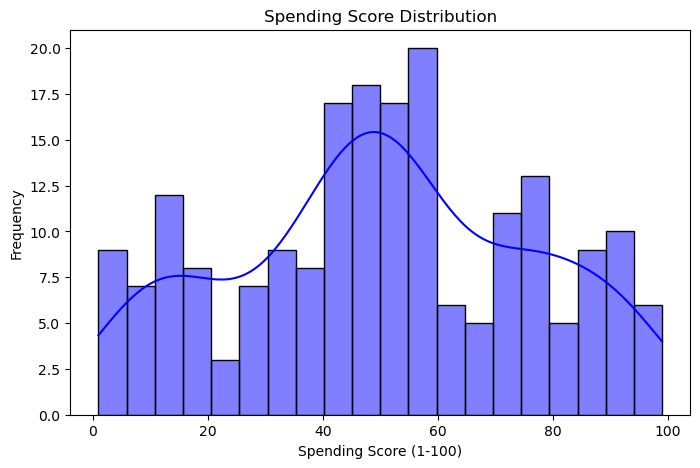

In [62]:
# Spending Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='blue')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

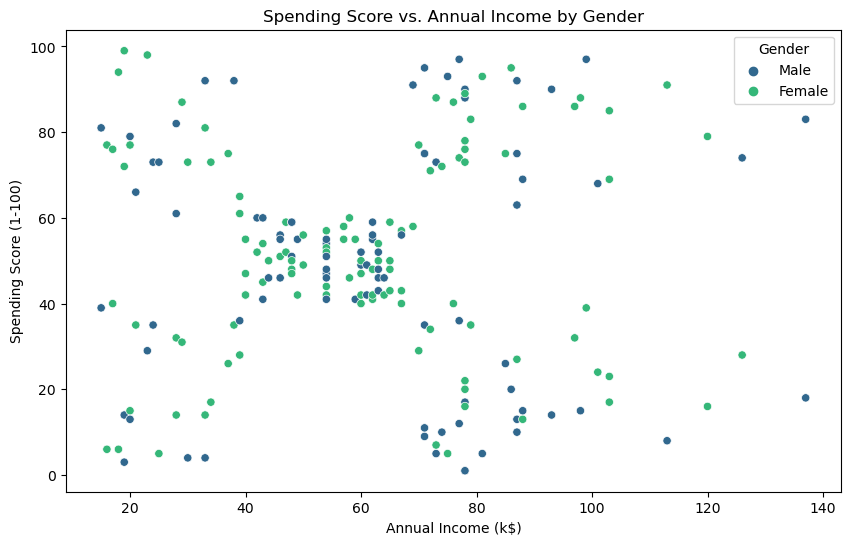

In [63]:
# Spending Score vs. Annual Income

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='viridis')
plt.title('Spending Score vs. Annual Income by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

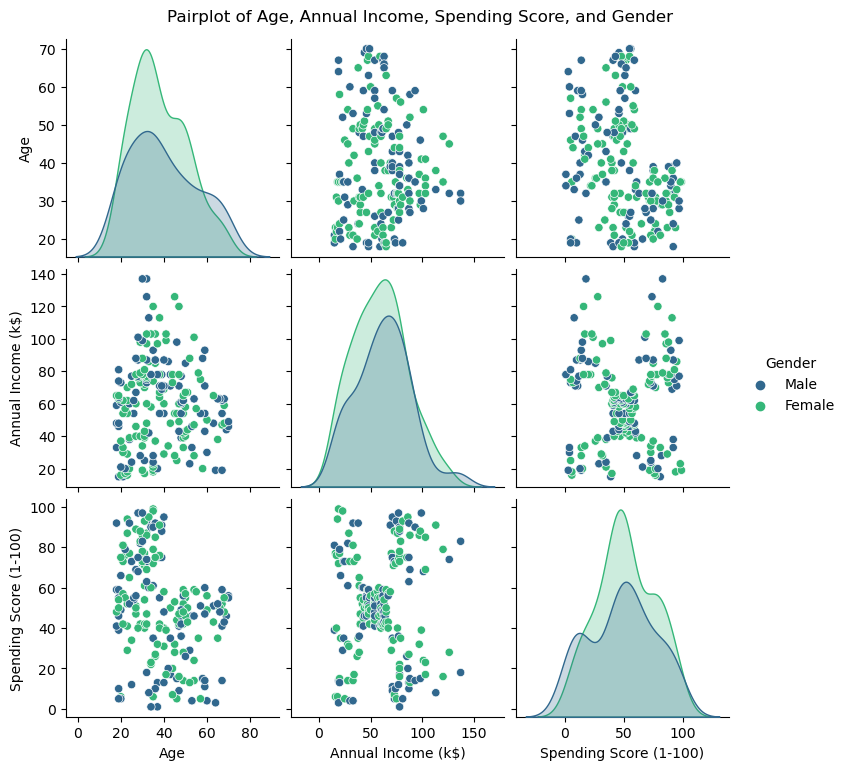

In [64]:
# Pairplot of Key Features

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='viridis')
plt.suptitle('Pairplot of Age, Annual Income, Spending Score, and Gender', y=1.02)
plt.show()

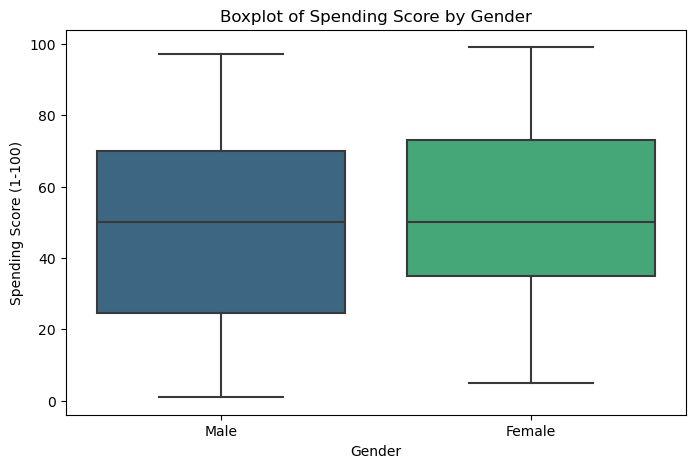

In [66]:
# Boxplot of Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Boxplot of Spending Score by Gender')
plt.show()

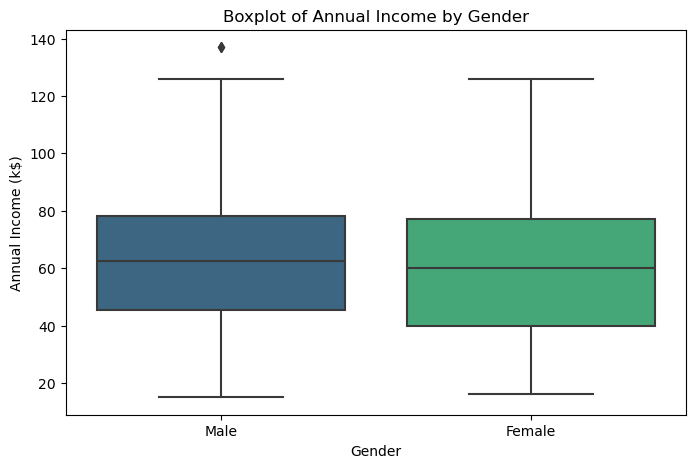

In [67]:
# Boxplot of Annual Income by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Boxplot of Annual Income by Gender')
plt.show()

# Converting Gender into categorical numeric variables

In [68]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [69]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [70]:
X = df[['Age', 'Spending Score (1-100)']]

# Standardize the data

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method

In [ ]:
# Finding the optimal number of clusters using the elbow method
wcss = []

for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++',random_state=21)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

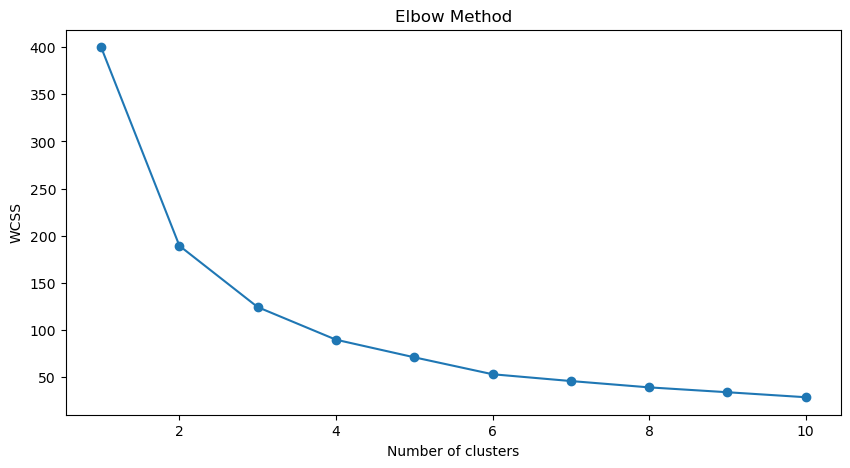

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-means to the dataset

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=21)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe

In [79]:
df['Cluster'] = y_kmeans

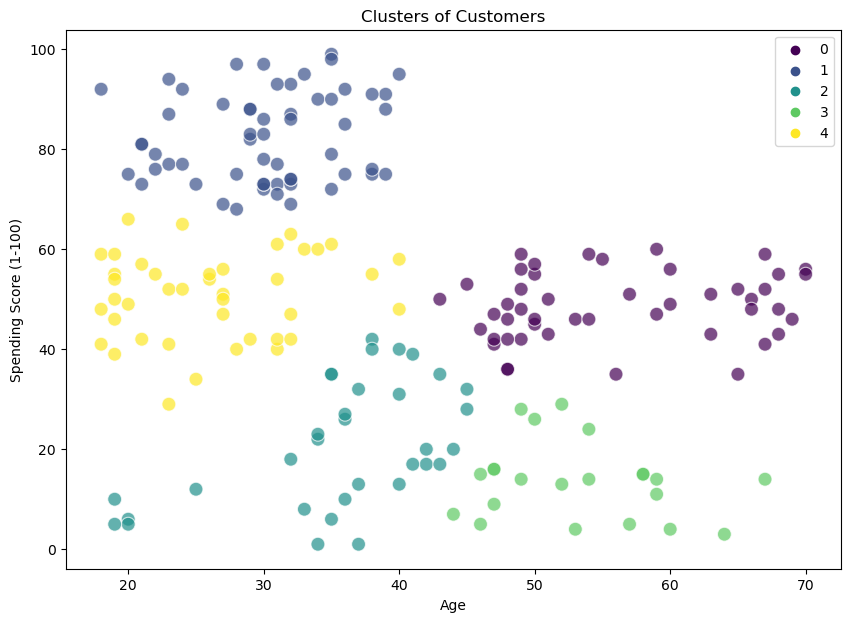

In [81]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Insights from K-Means Clustering Analysis

#1. Customers aged between 18-40 have a spending score above 70.
# This age group is likely to be more active and willing to spend on retail purchases. They might be more influenced by trends, promotions, and new products, making them an ideal target for marketing campaigns focused on high engagement and frequent purchasing.

#2. Customers aged between 45-70 have a spending score below 30.
# This age group tends to spend less compared to the younger demographic. They may be more conservative with their spending or have different purchasing priorities.